# Lesson 1
### Fast ai
* https://course.fast.ai/videos/?lesson=1

### Notes
* Accuracy = 1 - error_rate
#### Architecture
* The template of the model that we're trying to fit; the actual mathematical function that we're passing the input data and parameter to
##### Transfer learning
* Using a pretrained model for a task different to what it was originally trained for
##### Fine tuning
* A transfer learning technique where the weights of a pretrained model are updated by training for additional epochs using a different task to that used for pretraining
##### Overfitting


### Importing  libraries

In [32]:
import fastbook
fastbook.setup_book()
from fastai.vision.all import ImageDataLoaders, untar_data, Resize, cnn_learner, resnet34
from fastai.vision.all import *
from fastbook import widgets

In [33]:
path = untar_data(URLs.PETS)/'images'

### cnn-learner

In [19]:
def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=.2, seed=42,
    label_func = is_cat, item_tfms=Resize(224)
)

In [20]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.172088,0.014971,0.005413,00:55


epoch,train_loss,valid_loss,error_rate,time
0,0.057040,0.023697,0.006089,01:11


#### Testing

In [46]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

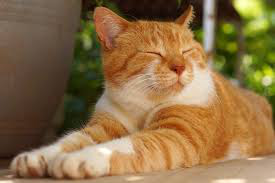

In [47]:
img = PILImage.create(uploader.data[0])
img

In [48]:
is_cat, _, probs = learn.predict(img)
print(f"Is this a cat ?: {is_cat}")
print(f"Probability it's a cat: {probs[1].item():.3f}")

Is this a cat ?: True
Probability it's a cat: 1.000


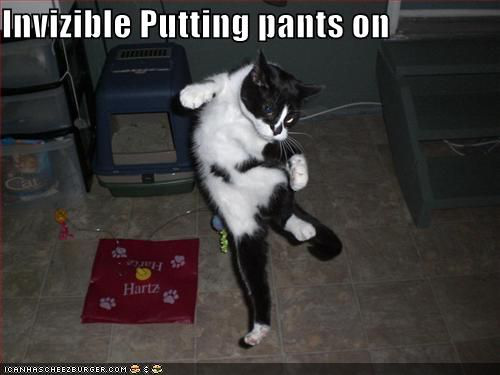

In [49]:
img1 = PILImage.create(uploader.data[0])
img1

In [51]:
is_cat, _, probs = learn.predict(img1)
print(f"Is this a cat ?: {is_cat}")
print(f"Probability it's a cat: {probs[1].item():.3f}")

Is this a cat ?: True
Probability it's a cat: 0.872


### Unet_learner

In [24]:
path = untar_data(URLs.CAMVID_TINY)

In [29]:

dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)


In [30]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(50)

epoch,train_loss,valid_loss,time
0,2.634563,2.089562,00:03


epoch,train_loss,valid_loss,time
0,1.756901,1.535590,00:03
1,1.553347,1.312000,00:03
2,1.409396,1.196215,00:03
3,1.305462,1.111854,00:03
4,1.233849,1.038746,00:03
5,1.144929,0.919956,00:03
6,1.054694,0.834380,00:03
7,0.982955,0.857987,00:03
8,0.927961,0.885788,00:03
9,0.875396,0.809362,00:03


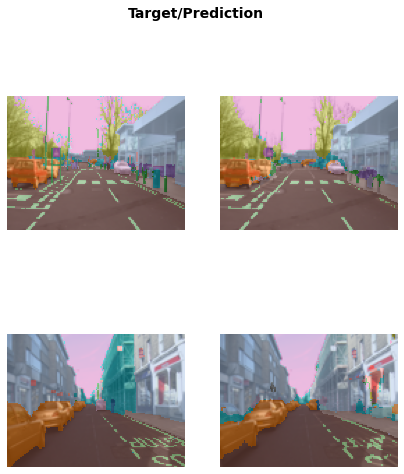

In [31]:
learn.show_results(max_n = 8, figsize=(7, 8))

### Text_classifer

In [3]:
from fastai.text.all import *

path = untar_data(URLs.IMDB)

In [23]:

dls = TextDataLoaders.from_folder(path, valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.4, metrics=accuracy)
learn.fine_tune(2, 1e-2)

FileNotFoundError: [Errno 2] No such file or directory: '/root/.fastai/data/imdb_tok/counter.pkl'